## MNIST OCR

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

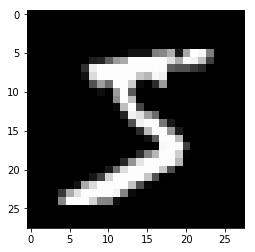

In [3]:
plt.imshow(x_train[0], cmap='gray')

In [4]:
x_train = x_train/255.
x_test = x_test /255.

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0623 01:13:08.789348 140152383461184 deprecation.py:506] From /home/elder/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('acc') > 0.993:
            print("\nReached 99% accuracy, stopping training!")
            self.model.stop_training = True
            
callback = myCallback()

In [7]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs = 10, callbacks=[callback])

Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1832 - acc: 0.9448
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0748 - acc: 0.9768
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0481 - acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0342 - acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0258 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0212 - acc: 0.9927
Epoch 7/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0174 - acc: 0.9943
Reached 99% accuracy, stopping training!
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0173 - acc: 0.9944


## Test a few samples

In [9]:
predictions = model.predict(x_test)

Prediction: 2
Label: 2


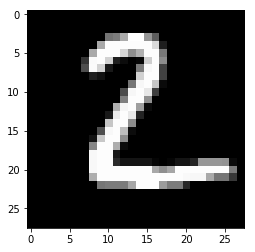

In [10]:
print("Prediction:", np.argmax(predictions[1]))
print("Label:", y_test[1])
plt.imshow(x_test[1], cmap='gray')

Prediction: 0
Label: 0


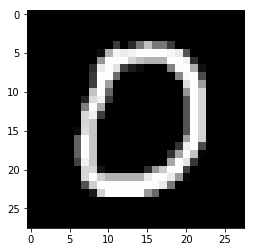

In [11]:
print("Prediction:", np.argmax(predictions[10]))
print("Label:", y_test[10])
plt.imshow(x_test[10], cmap='gray')

Prediction: 3
Label: 3


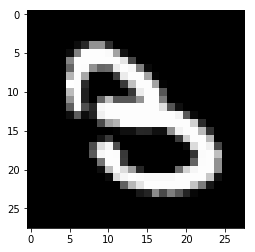

In [12]:
print("Prediction:", np.argmax(predictions[18]))
print("Label:", y_test[18])
plt.imshow(x_test[18], cmap='gray')

In [13]:
## Find mispredictions
mispred = []
for index,pred in enumerate(predictions):
    predicted_label = np.argmax(pred)
    label = y_test[index]
    if predicted_label != label:
        mispred.append(index)
        
print("Mispredicted indexes", mispred)

Mispredicted indexes [115, 149, 247, 321, 340, 445, 495, 582, 619, 684, 691, 720, 900, 924, 951, 956, 1014, 1039, 1112, 1156, 1166, 1181, 1182, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1328, 1393, 1395, 1425, 1496, 1500, 1522, 1530, 1549, 1553, 1554, 1621, 1626, 1678, 1681, 1754, 1790, 1871, 1878, 1901, 1940, 1984, 2024, 2035, 2053, 2070, 2098, 2109, 2118, 2125, 2130, 2135, 2272, 2293, 2339, 2369, 2387, 2406, 2414, 2447, 2488, 2582, 2597, 2648, 2654, 2771, 2863, 2939, 2953, 3117, 3267, 3289, 3342, 3388, 3405, 3422, 3503, 3520, 3558, 3559, 3597, 3629, 3718, 3727, 3780, 3796, 3808, 3818, 3853, 3893, 3902, 3906, 3941, 4027, 4065, 4078, 4156, 4163, 4176, 4199, 4248, 4289, 4360, 4384, 4425, 4497, 4500, 4536, 4551, 4567, 4578, 4740, 4807, 4814, 4823, 4860, 4880, 4956, 5046, 5634, 5642, 5649, 5676, 5734, 5749, 5887, 5936, 5937, 5955, 5972, 5973, 5981, 5982, 5997, 6011, 6023, 6059, 6166, 6555, 6574, 6576, 6597, 6625, 6651, 6755, 6847, 7216, 8059, 8091, 8094, 8143, 8311, 9009, 9015, 9024, 9280

Prediction: 9
Label: 4


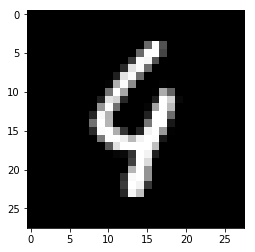

In [14]:
print("Prediction:", np.argmax(predictions[mispred[0]]))
print("Label:", y_test[mispred[0]])
plt.imshow(x_test[mispred[0]], cmap='gray')

Prediction: 9
Label: 2


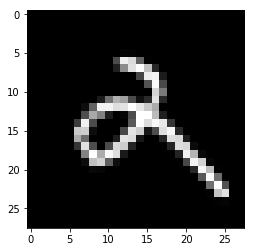

In [15]:
print("Prediction:", np.argmax(predictions[mispred[1]]))
print("Label:", y_test[mispred[1]])
plt.imshow(x_test[mispred[1]], cmap='gray')